In [249]:
import pandas as pd


def read_csv_file(file_path):
    """
    Reads a CSV file and returns a DataFrame.
    
    :param file_path: Path to the CSV file.
    :return: DataFrame containing the data from the CSV file.
    """
    try:
        df = pd.read_csv(file_path)
        return df
    except Exception as e:
        print(f"Error reading the CSV file: {e}")
        return None
    
train_df = read_csv_file('./data/train.csv')

test_df = read_csv_file('./data/test.csv')

### Sorting

In [250]:
train_df = train_df.sort_values(by='Fare', ascending=False)
test_df = test_df.sort_values(by='Fare', ascending=False)

## Exploratory Data Analysis (EDA) for Titanic Dataset

Get training data set information

In [251]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 737 to 806
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


Get test data set information

In [252]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 343 to 152
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


Describe Test Dataset

In [253]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Describe Test Dataset

In [254]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Columns with Missing Values in Training Dataset

In [255]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Columns with Missing Values in Test Dataset

In [256]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Unique Values in Training Dataset

In [257]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Unique Values in Test Dataset

In [258]:
test_df.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

### Analysis

Set Visualization Configuration and Style

In [259]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(rc={'figure.figsize':(12, 8)})

#### Bar Chart for Survival Count

<Axes: xlabel='Survived', ylabel='count'>

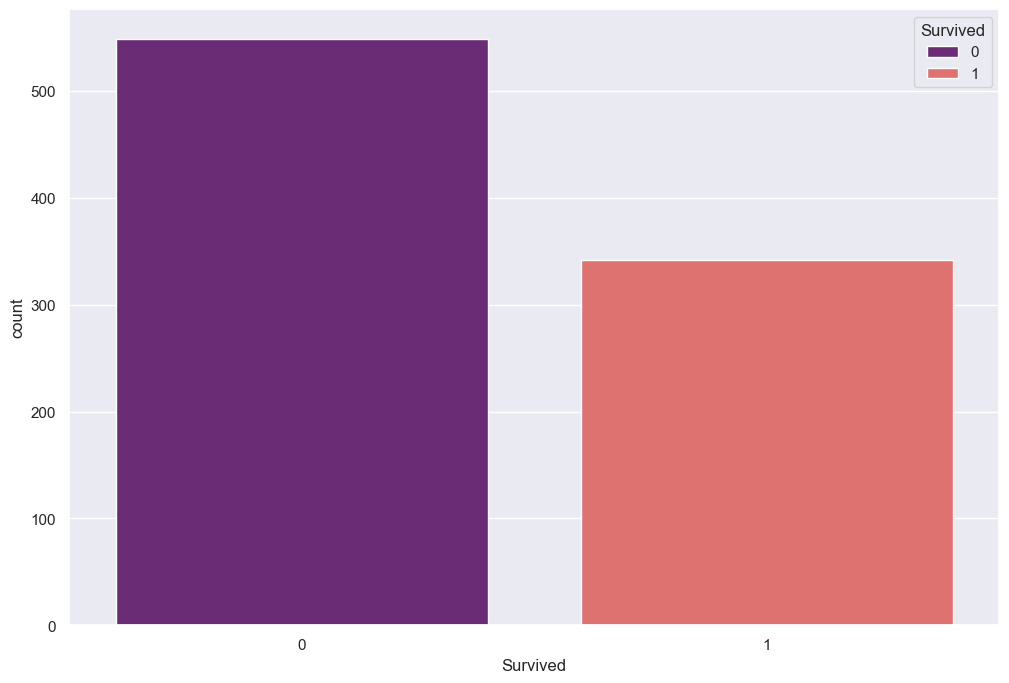

In [260]:
# survival count plot
sns.countplot(x=train_df['Survived'], data=train_df, palette='magma', hue='Survived')

#### Bar chart for Survival Count per Gender

<Axes: xlabel='Sex', ylabel='count'>

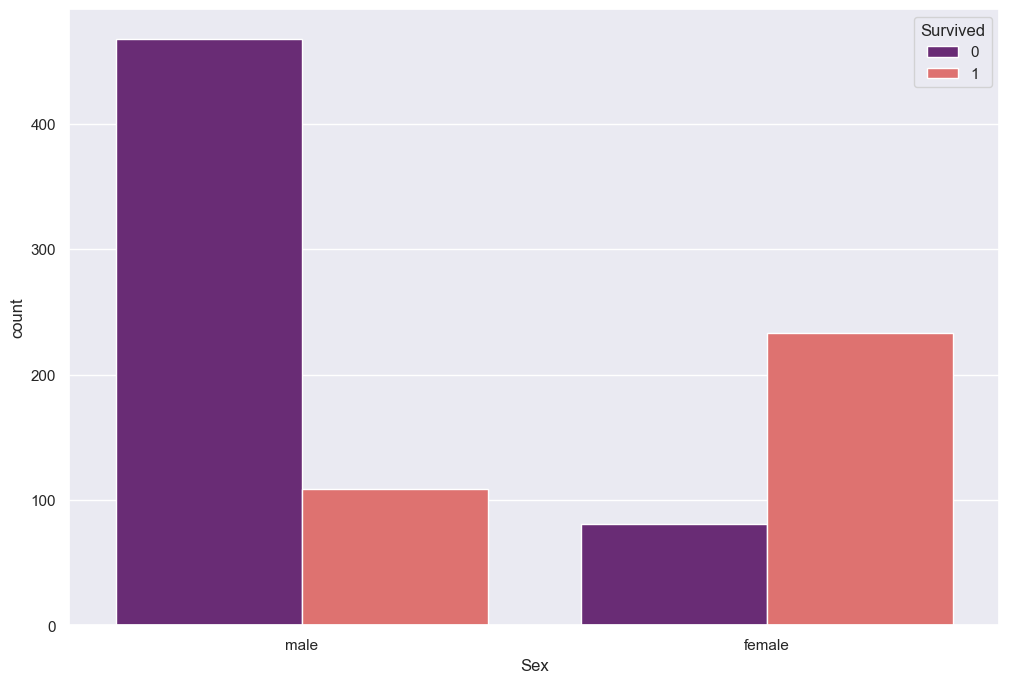

In [261]:
# sex count plot for survival
sns.countplot(x=train_df['Sex'], data=train_df, palette='magma', hue='Survived')

### Bar chart for Survival Count per Embarked

<Axes: xlabel='Embarked', ylabel='count'>

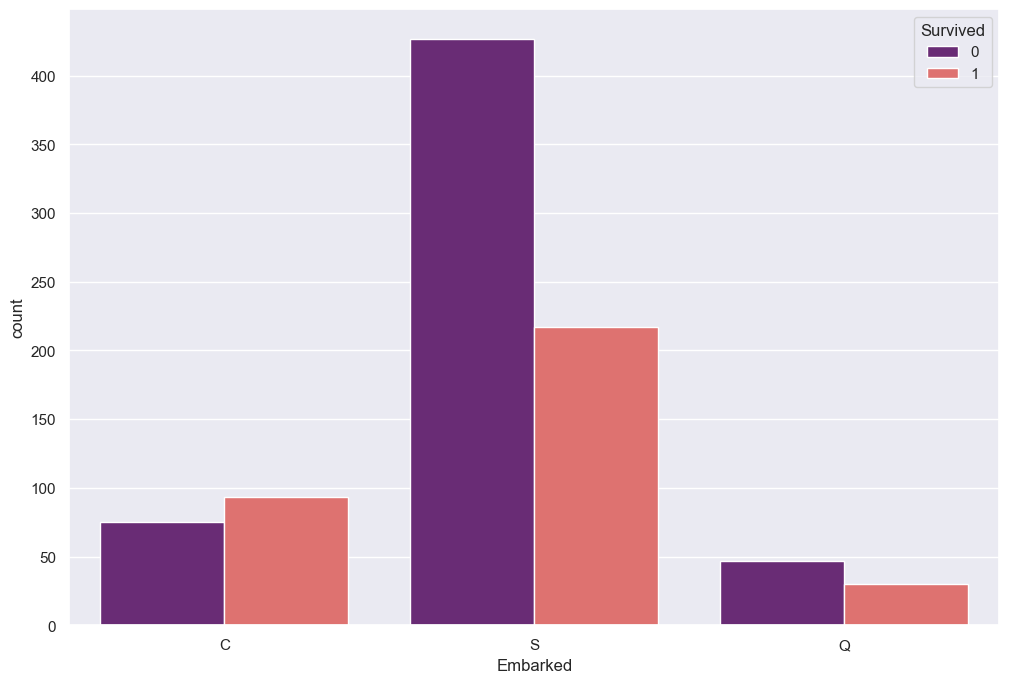

In [262]:
# embarked count plot for survival
sns.countplot(x=train_df['Embarked'], data=train_df, palette='magma', hue='Survived')

#### Bar Chart for Survival Count per Passenger Class

<Axes: xlabel='Pclass', ylabel='count'>

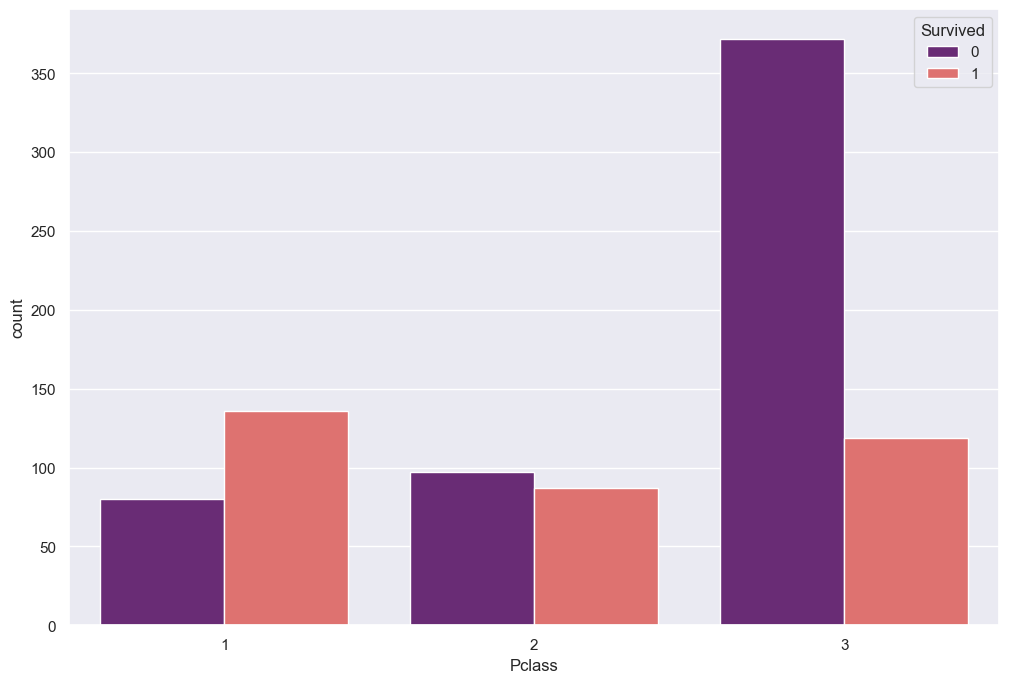

In [263]:
# passenger class count plot for survival
sns.countplot(x=train_df['Pclass'], data=train_df, palette='magma', hue='Survived')

#### Age and Survival Analysis - Training Dataset

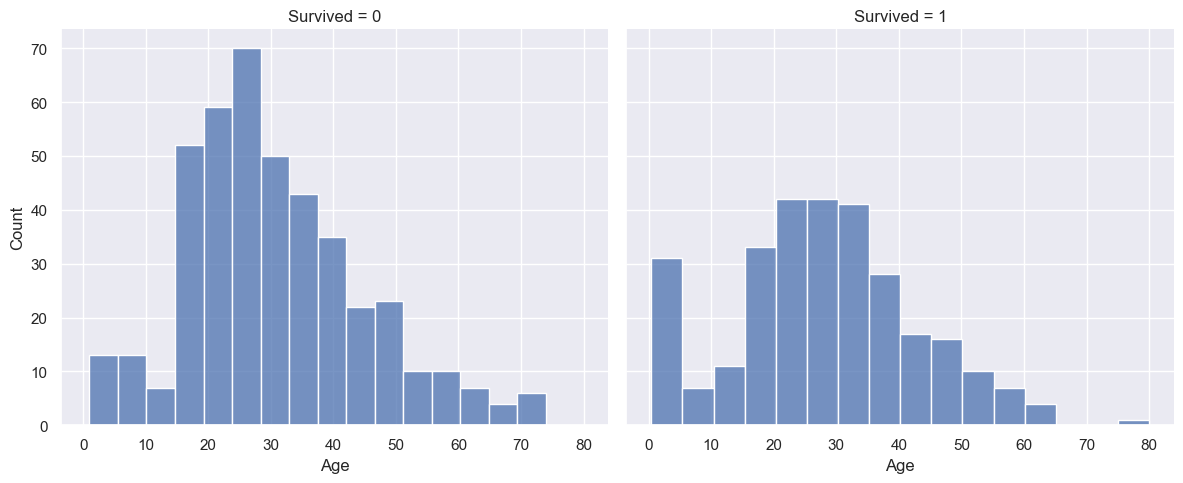

In [264]:
g = sns.FacetGrid(train_df, col='Survived', height=5, aspect=1.2)
g.map(sns.histplot, 'Age', kde=False)

#### Fare and Survival Analysis - Training Dataset

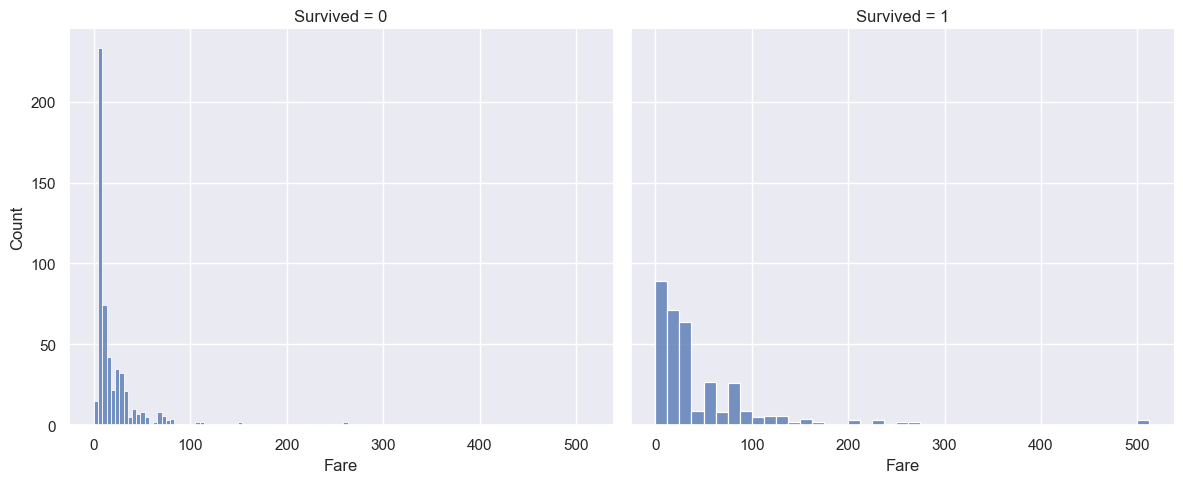

In [265]:
g = sns.FacetGrid(train_df, col='Survived', height=5, aspect=1.2)
g.map(sns.histplot, 'Fare', kde=False)

#### Parent and Child Survival Analysis - Training Dataset

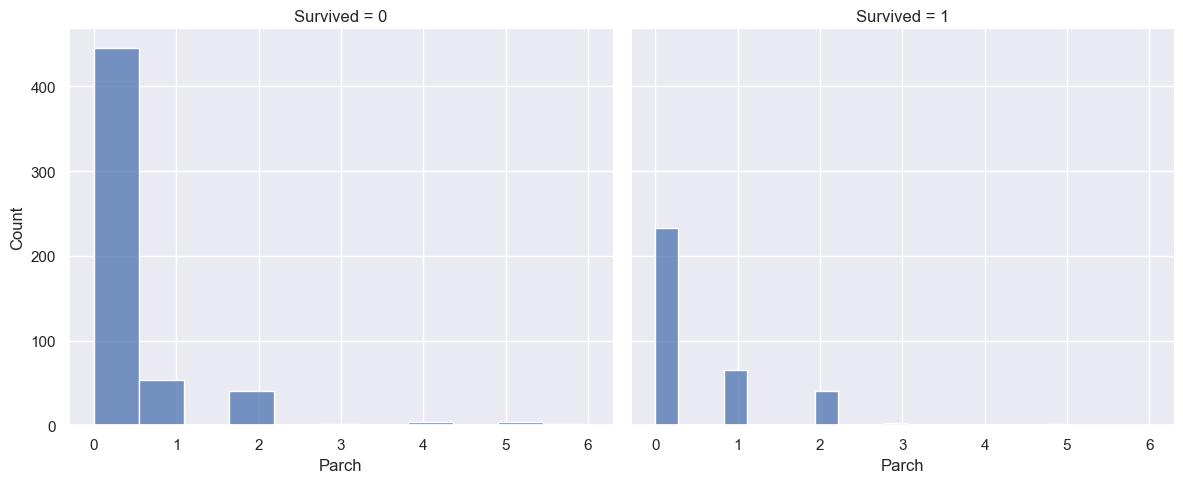

In [266]:
g = sns.FacetGrid(train_df, col='Survived', height=5, aspect=1.2)
g.map(sns.histplot, 'Parch', kde=False)

#### Sibling and Spouse Survival Analysis - Training Dataset

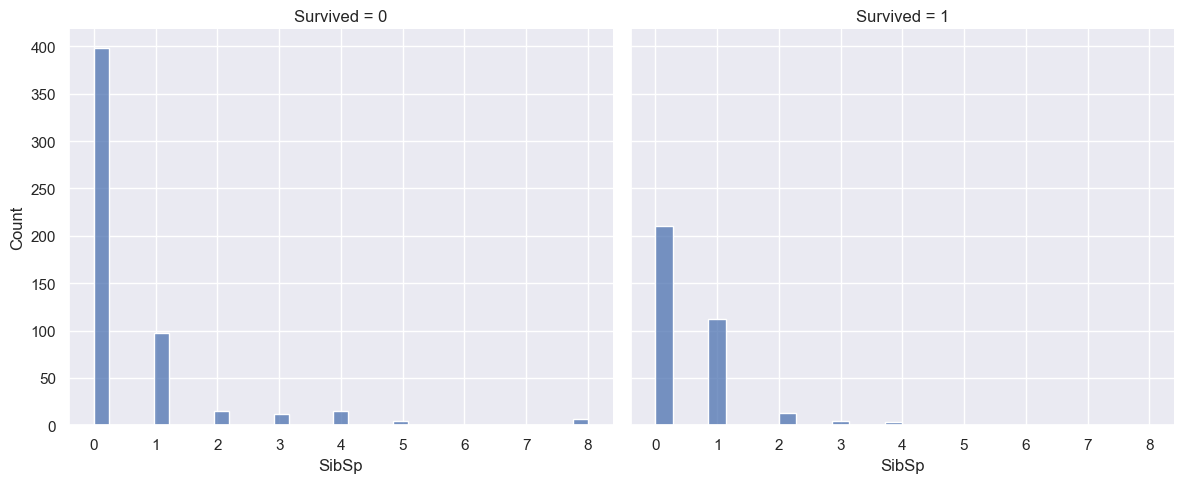

In [267]:
g = sns.FacetGrid(train_df, col='Survived', height=5, aspect=1.2)
g.map(sns.histplot, 'SibSp', kde=False)

#### Family Size and Survival Analysis - Training Dataset

Family size is combined from the number of siblings/spouses and parents/children on board.

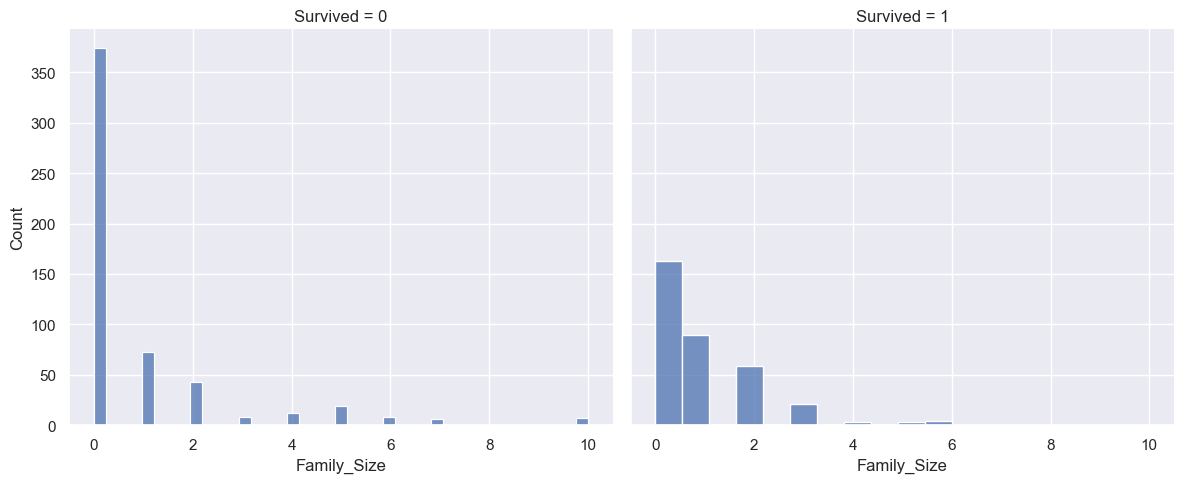

In [268]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch']
g = sns.FacetGrid(train_df, col='Survived', height=5, aspect=1.2)
g.map(sns.histplot, 'Family_Size', kde=False)

### Outlier Detection and Removal

#### Training Dataset

<Axes: xlabel='Fare'>

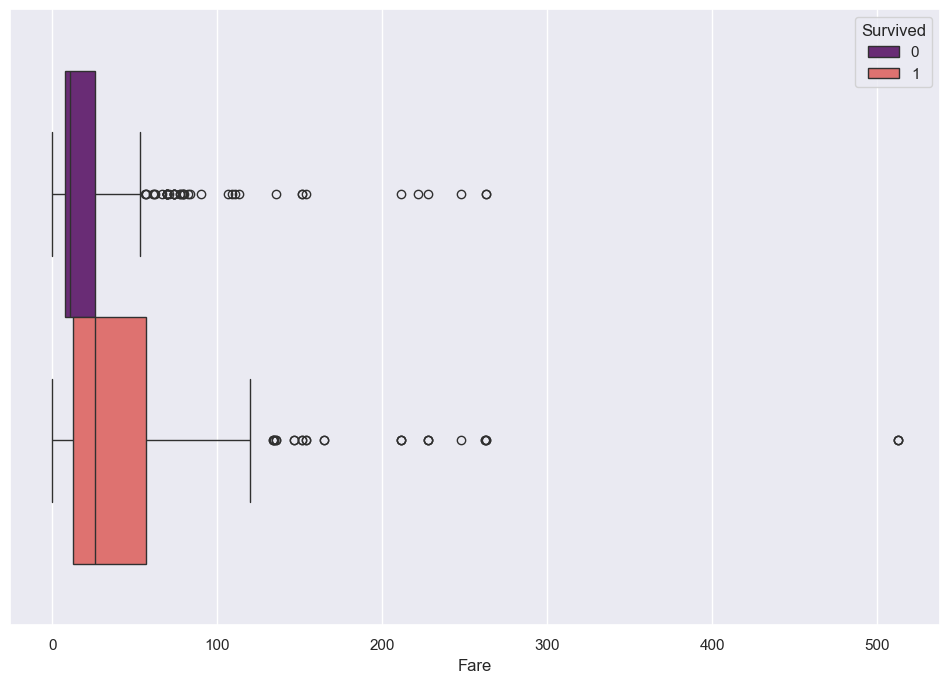

In [269]:
## Fare

sns.boxplot(x=train_df['Fare'], data=train_df, palette='magma', hue='Survived')

In [270]:
Q1 = train_df['Fare'].quantile(0.25)
Q3 = train_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = train_df[(train_df['Fare'] < Q1 - 1.5 * IQR) | (train_df['Fare'] > Q3 + 1.5 * IQR)]
outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,5
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S,10
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,0
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,0
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S,1


#### Test Dataset

/Users/brianbirir/.local/share/virtualenvs/ml-experiments-NB7crgcD/lib/python3.9/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/var/folders/r_/jvt1rv_x24zfn_hh6c6kkt8h0000gn/T/ipykernel_11277/1673877730.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=test_df['Fare'], data=test_df, palette='magma', orient='v')


<Axes: xlabel='Fare'>

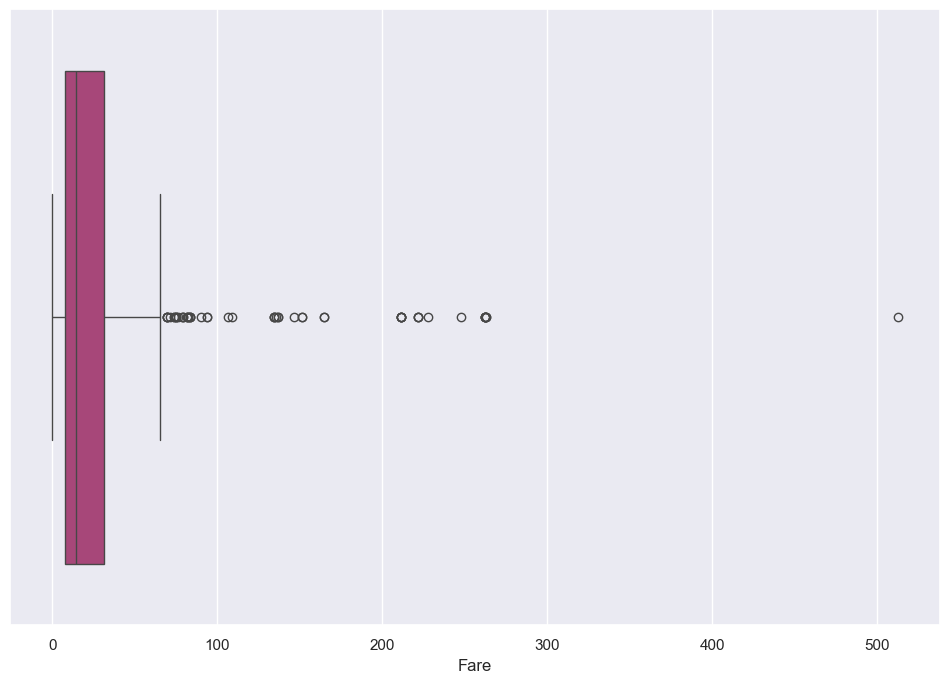

In [271]:
sns.boxplot(x=test_df['Fare'], data=test_df, palette='magma', orient='v')

In [272]:
women = train_df.loc[train_df.Sex == 'female']["Survived"]

rate_women = sum(women)/len(women)

print("% of women who survived:", f"{rate_women * 100}%")

% of women who survived: 74.20382165605095%


In [273]:
men = train_df.loc[train_df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", f"{rate_men * 100}%")

% of men who survived: 18.890814558058924%


### Clean Data

- Replace missing values in the "Age" column with the mean age.

In [274]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(train_df['Age'].mean())

- Replace missing values in the "Embarked" column with the mean age. Replace with 'S' as it is the most common embarkation point based on the analysis above i.e. `Bar chart for Survival Count per Embarked`

In [275]:
train_df['Embarked'] = train_df['Embarked'].fillna('s')
test_df['Embarked'] = test_df['Embarked'].fillna('s')

Confirm missing values in the "Age" and "Embarked" columns have been replaced.

In [276]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 737 to 806
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Family_Size  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [277]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 343 to 152
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


## Train Model and Make Predictions

In [ ]:
from sklearn.ensemble import RandomForestClassifier


y_train = train_df["Survived"]

features = ["Pclass", "SibSp", "Parch", "Sex", "Age"]

X_train = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])

model = RandomForestClassifier(n_estimators=2000, random_state=42, max_depth=5)

model.fit(X_train, y_train)

y_predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': y_predictions})

output.to_csv('./results/titanic_submission.csv', index=False)

output.head()

X_train.head()